# AWeSoMe Lab Intro and Setup Assignment Notebook

This is the Jupyter notebook for the HMC AWeSoMe Lab Intro and Setup Assignment "Hello, Convokit" ([writeup here](https://docs.google.com/document/d/1sMnhaWcx5VgZDhnTW4xSj0FmjITdqFqoMXMWCEoHyoE/edit?usp=sharing)). Solutions to coding questions _and_ written questions should be put here (you can use markdown cells for the written questions).

## Part 1: Load a Corpus!

See the [writeup for Part 1](https://docs.google.com/document/d/1sMnhaWcx5VgZDhnTW4xSj0FmjITdqFqoMXMWCEoHyoE/edit?tab=t.0#heading=h.yhpnne8a6ns3) before continuing.

In [3]:
from convokit import Corpus, download, FightingWords

In [4]:
reddit_corpus = Corpus(filename=download("reddit-corpus-small"))

Dataset already exists at /home/mputzer/.convokit/saved-corpora/reddit-corpus-small


In [5]:
reddit_corpus.print_summary_stats()

Number of Speakers: 119889
Number of Utterances: 297132
Number of Conversations: 8286


## Part 2: Re-implement print_summary_stats

See the [writeup for Part 2](https://docs.google.com/document/d/1sMnhaWcx5VgZDhnTW4xSj0FmjITdqFqoMXMWCEoHyoE/edit?tab=t.0#heading=h.jz5jp4t11fwd) before continuing.

In [6]:
# Here's how you would iterate over Speakers:
n_speakers = 0
for speaker in reddit_corpus.iter_speakers():
    n_speakers += 1
print(n_speakers)

119889


TASK: In the two code cells below, modify the provided code to count Utterances and Speakers.

In [7]:
print(reddit_corpus.iter_speakers())

<generator object Corpus.iter_speakers at 0x705f92920900>


In [8]:
def n_in_list(list):
    '''
    Iterates over list and gives the number of items in the corpus
    '''
    n_speakers = 0
    for speaker in list:
        n_speakers += 1
    return n_speakers

print(n_in_list(reddit_corpus.iter_speakers()))
print(n_in_list(reddit_corpus.iter_conversations()))
print(n_in_list(reddit_corpus.iter_utterances()))


119889
8286
297132


## Part 3: Working with metadata

See the [writeup for Part 3](https://docs.google.com/document/d/1sMnhaWcx5VgZDhnTW4xSj0FmjITdqFqoMXMWCEoHyoE/edit?tab=t.0#heading=h.ciwzim5uquvi) before continuing.

In [9]:
# Here's an example of accessing Conversation metadata
# (demonstrated on a randomly selected Conversation)
c = reddit_corpus.random_conversation()
print(c.meta["gilded"])

0


TASK: Using conversation-level metadata and the iterators you practiced in Part 2, compute (a) the total number of subreddits in the Corpus, and (b) the 5 subreddits with the most conversations (along with the exact number of conversations in each of those 5 subreddits).

In [10]:

subreddits = {}

for post in reddit_corpus.iter_conversations():
    temp_sub = post.meta["subreddit"]

    # count number of posts per subreddit
    if temp_sub in subreddits:
        subreddits[temp_sub] = subreddits.get(temp_sub) + 1
    else:
        subreddits[temp_sub] = 1


print("The number of subreddits is " + str(len(subreddits)))
print("the top five subreddits are "+ str(sorted(subreddits, key=subreddits.get, reverse=True)[:5]))

print(subreddits)

The number of subreddits is 100
the top five subreddits are ['funny', 'teenagers', 'hockey', 'pokemontrades', 'techsupport']
{'singapore': 70, 'tifu': 58, 'cringepics': 30, 'motorcycles': 93, 'TwoXChromosomes': 83, 'hockey': 98, 'sex': 92, 'Christianity': 94, 'conspiracy': 97, 'canada': 92, 'pokemontrades': 98, 'Guildwars2': 88, 'askscience': 73, 'IAmA': 39, 'australia': 94, 'relationships': 97, 'Bitcoin': 95, 'business': 53, 'electronic_cigarette': 87, 'MMA': 93, 'DebateReligion': 75, 'skyrim': 80, 'movies': 92, 'WTF': 91, 'Android': 90, 'OkCupid': 90, 'Frugal': 64, 'anime': 72, 'todayilearned': 93, 'Fitness': 80, 'SquaredCircle': 91, 'photography': 77, 'hiphopheads': 85, 'POLITIC': 97, 'apple': 80, 'science': 62, 'AskMen': 82, 'pokemon': 80, 'offbeat': 51, 'Games': 90, 'Minecraft': 78, 'guns': 91, 'AskWomen': 77, 'politics': 94, 'technology': 73, 'wow': 93, 'Music': 56, 'tf2': 91, 'cringe': 45, 'techsupport': 98, 'news': 89, 'cars': 89, 'MensRights': 86, 'malefashionadvice': 74, 'bui

## Part 4: Transformers, roll out!

See the [writeup for Part 4](https://docs.google.com/document/d/1sMnhaWcx5VgZDhnTW4xSj0FmjITdqFqoMXMWCEoHyoE/edit?tab=t.0#heading=h.lhawg1ufgxev) before continuing.

In [11]:
# Here's an example of applying a simple Transformation
# (the TextCleaner, which does basic text standardization such as lowercasing everything)
from convokit import TextCleaner
cleaner = TextCleaner(replace_text=False)
# reddit_corpus = cleaner.transform(reddit_corpus)
# utt = reddit_corpus.random_utterance()
# print("Original text:", utt.text)
# print("Cleaned text:", utt.meta["cleaned"])

TASK: Use the [Fighting Words Transformer](https://convokit.cornell.edu/documentation/fightingwords.html) to generate a plot comparing the usage of words in the subreddits "nfl" and "programming".

Initializing default CountVectorizer with ngram_range (1, 1)... Done.
class1_func returned 2533 valid corpus components. class2_func returned 3233 valid corpus components.
Vocab size is 1976
Comparing language...
ngram zscores computed.


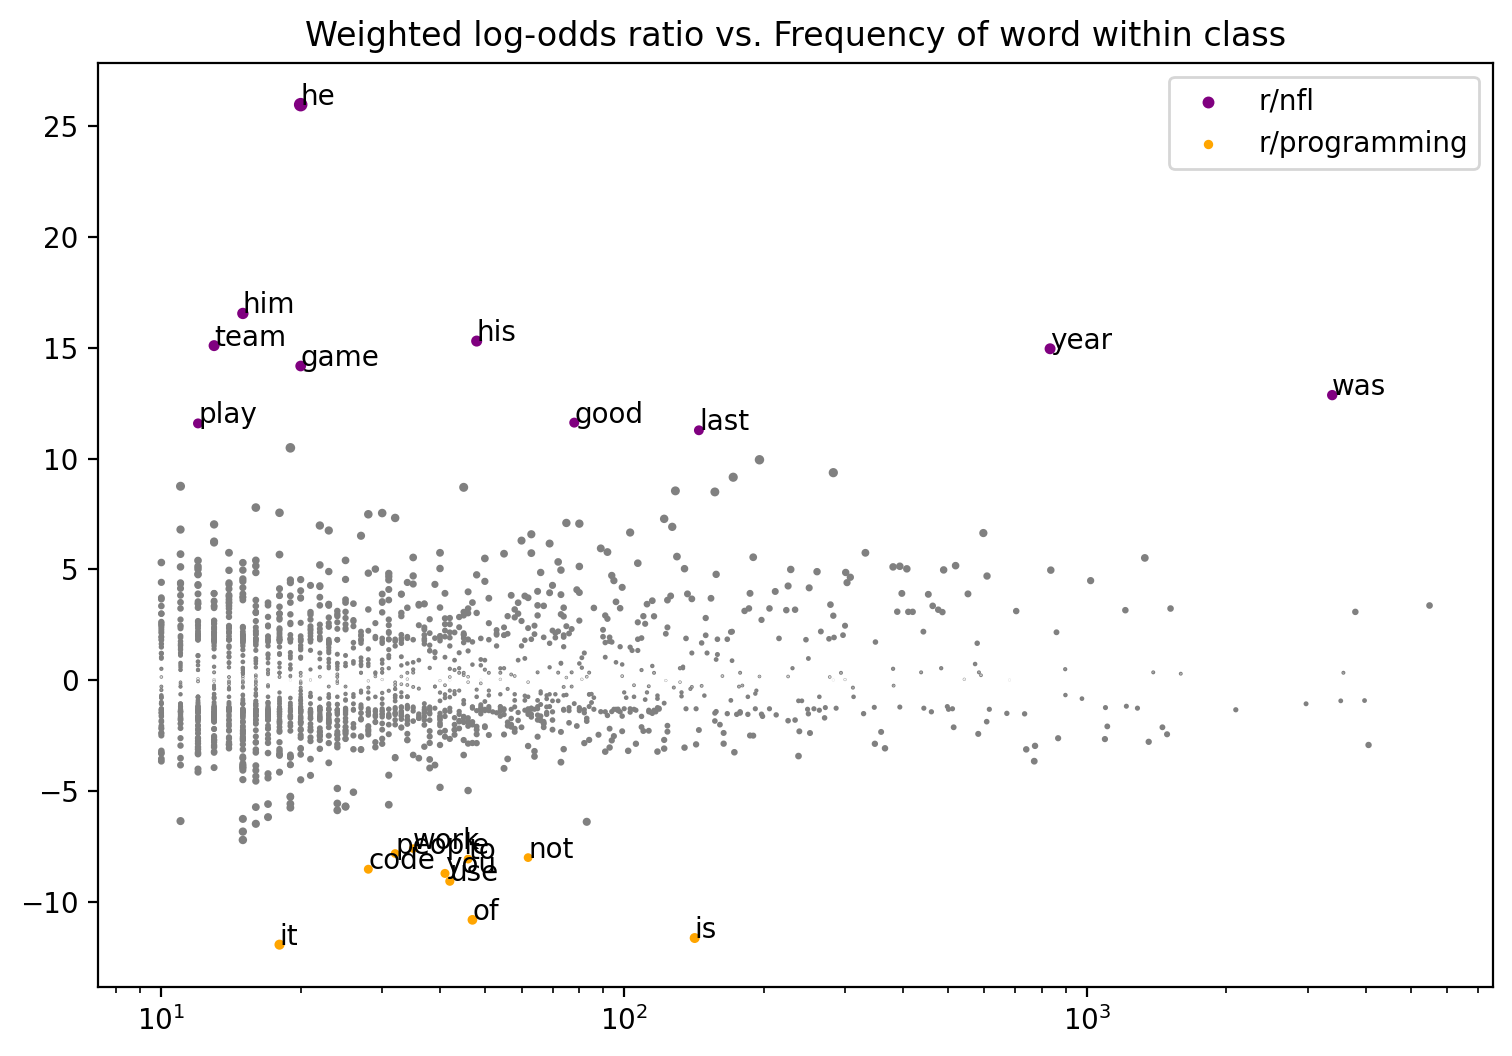

,z-score,class
ngram,,
it,-11.942379,r/programming
is,-11.643340,r/programming
of,-10.821973,r/programming
use,-9.079404,r/programming
you,-8.726617,r/programming
...,...,...
year,14.955275,r/nfl
team,15.096837,r/nfl
his,15.302508,r/nfl


In [12]:
# write code that applies the fightingwords transformer to the reddit corpus to compare the language 
# used in the subreddits "nfl" and "programming". Produce plot showing differences

fw = FightingWords(ngram_range=(1,1))

fw.fit(reddit_corpus, class1_func=lambda utt: utt.meta['subreddit'] == 'nfl',
                      class2_func=lambda utt: utt.meta['subreddit'] == 'programming')

df = fw.summarize(reddit_corpus, plot=True, class1_name='r/nfl', class2_name='r/programming')

df

## Part 5: Your turn!

See the [writeup for Part 5](https://docs.google.com/document/d/1sMnhaWcx5VgZDhnTW4xSj0FmjITdqFqoMXMWCEoHyoE/edit?tab=t.0#heading=h.ep64m0asidvd) before continuing.

Before you write any code, please write down in this text cell what groups you have chosen to compare, and what hypotheses you came up with beforehand.

In [13]:
# Add your code here.
# (You may also add as many additional code cells as you want)

#compare AskMen and AskWomen

subreddits = {}


for post in reddit_corpus.iter_utterances():
    temp_sub = (post.meta["subreddit"], post.meta["author_flair_text"]) if (post.meta["subreddit"] == "AskMen" or post.meta["subreddit"] == "AskWomen") else None

    # count number of posts per subreddit
    if temp_sub in subreddits:
        subreddits[temp_sub] = subreddits.get(temp_sub) + 1
    else:
        subreddits[temp_sub] = 1

print("the top five subreddits are "+ str(sorted(subreddits.items(), key=lambda item: item[1])))

print(subreddits)

#Compare symbol male vs. female
#Female vs male (lump specific similar flairs)
#No flair compare

the top five subreddits are [(('AskMen', 'I find people interesting'), 1), (('AskMen', 'somewhat manly enough to call myself a man'), 1), (('AskMen', 'Homo Erectus'), 1), (('AskMen', 'Cute Little Curly Fry'), 1), (('AskMen', 'Lemon stealing whore'), 1), (('AskMen', 'Dude'), 1), (('AskMen', 'Add More Dudes'), 1), (('AskMen', 'Young Man'), 1), (('AskMen', 'The Dude'), 1), (('AskMen', 'silence'), 1), (('AskMen', 'possibly god??'), 1), (('AskMen', '♂ level:11/10'), 1), (('AskMen', 'Tricycle'), 1), (('AskMen', '22/M'), 1), (('AskMen', 'GAY'), 1), (('AskMen', "I don't know how we walk around with these things"), 1), (('AskMen', '.'), 1), (('AskMen', 'Since you asked, sure, have a flair'), 1), (('AskMen', 'XX'), 1), (('AskMen', 'Duuuuuuuuude'), 1), (('AskMen', 'I really am'), 1), (('AskMen', 'Send Yoga Pants'), 1), (('AskMen', "Punk music is a joke; it's really just baroque."), 1), (('AskMen', 'Lad'), 1), (('AskMen', 'Male Doggo'), 1), (('AskMen', 'negative, I am a meat popsicle'), 1), (('Ask

Initializing default CountVectorizer with ngram_range (1, 1)... Done.
class1_func returned 2895 valid corpus components. class2_func returned 2 valid corpus components.
Vocab size is 907
Comparing language...
ngram zscores computed.


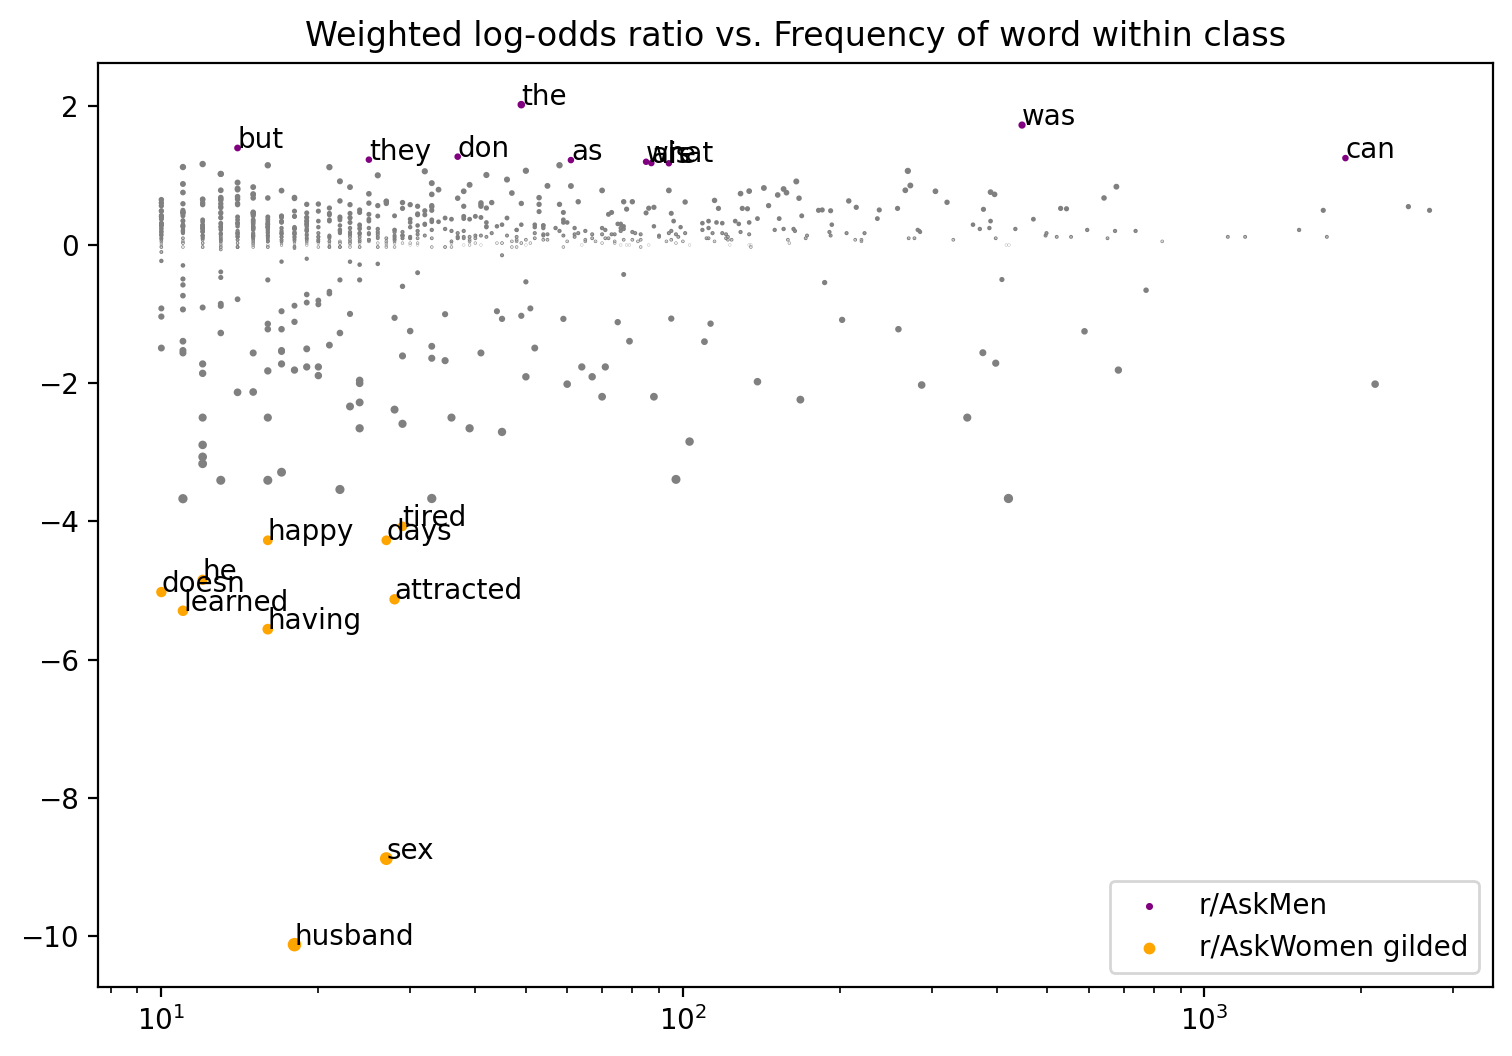

,z-score,class
ngram,,
husband,-10.119299,r/AskWomen gilded
sex,-8.875357,r/AskWomen gilded
having,-5.559008,r/AskWomen gilded
learned,-5.292934,r/AskWomen gilded
attracted,-5.127295,r/AskWomen gilded
...,...,...
can,1.250508,r/AskMen
don,1.270994,r/AskMen
but,1.396586,r/AskMen


In [14]:

fw = FightingWords(ngram_range=(1,1))


fw.fit(reddit_corpus, class1_func=lambda utt: utt.meta['subreddit'] == 'AskMen',
                      class2_func=lambda utt: utt.meta['subreddit'] == 'AskWomen' and utt.meta['gilded'] == 1)
                      
df = fw.summarize(reddit_corpus, plot=True, class1_name='r/AskMen', class2_name='r/AskWomen gilded')

df


Initializing default CountVectorizer with ngram_range (1, 1)... Done.
class1_func returned 1 valid corpus components. class2_func returned 2387 valid corpus components.
Vocab size is 878
Comparing language...
ngram zscores computed.


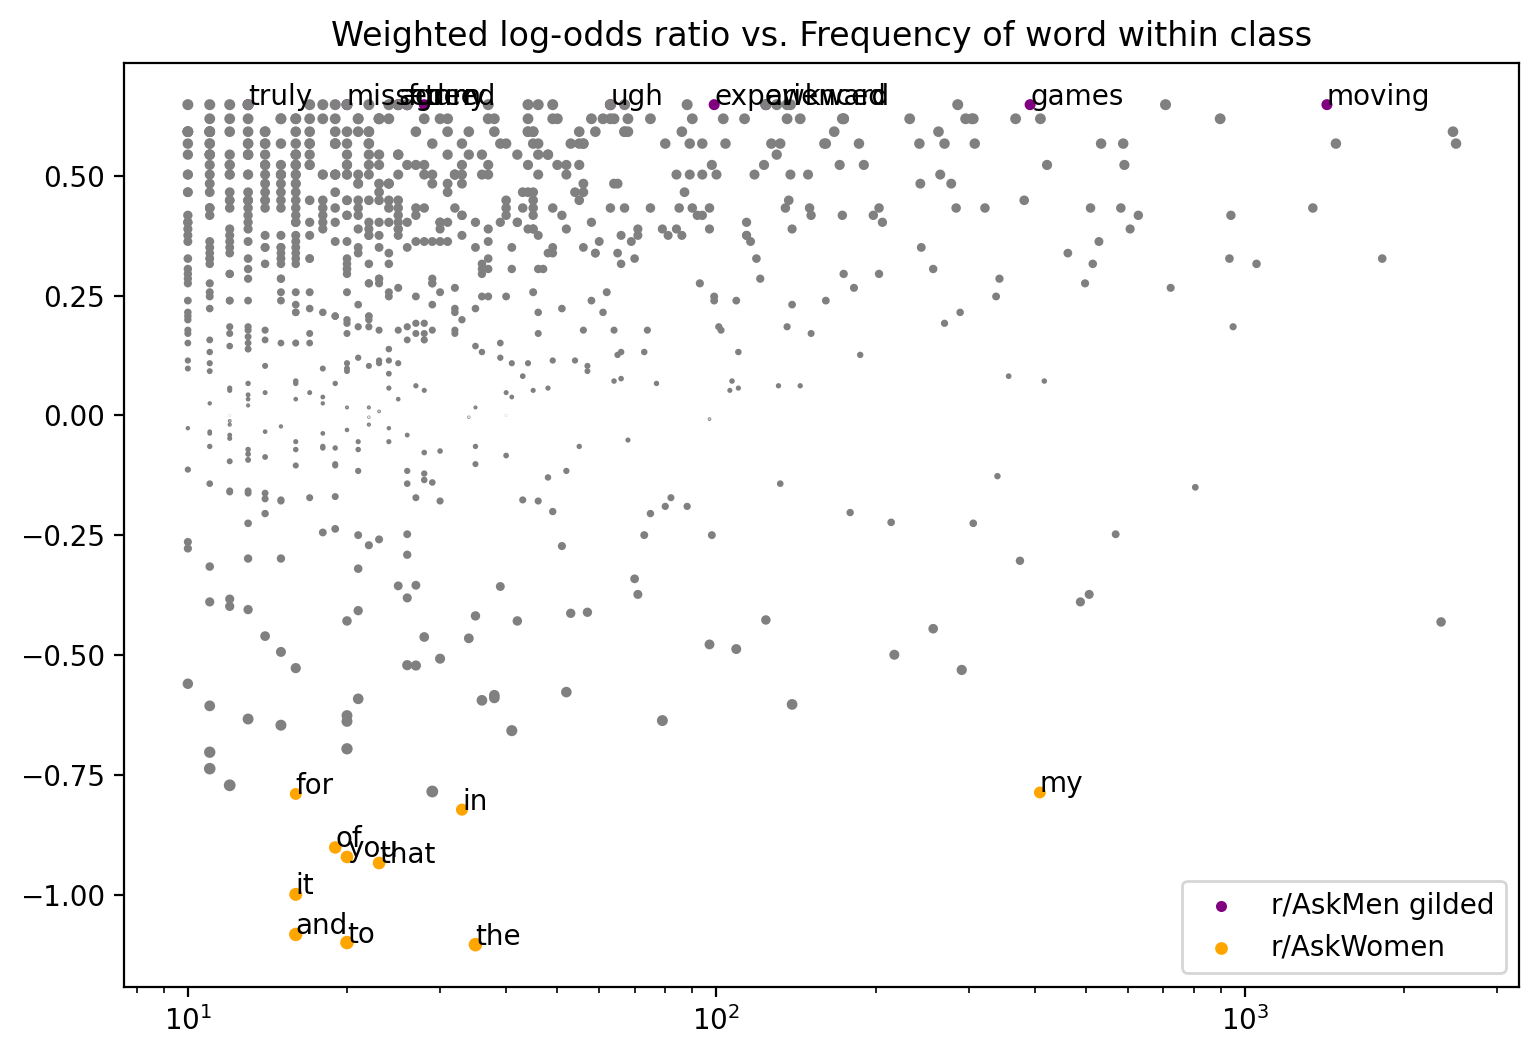

,z-score,class
ngram,,
the,-1.103861,r/AskWomen
to,-1.099514,r/AskWomen
and,-1.082522,r/AskWomen
it,-0.998957,r/AskWomen
that,-0.933603,r/AskWomen
...,...,...
funny,0.648149,r/AskMen gilded
missed,0.648149,r/AskMen gilded
games,0.648149,r/AskMen gilded


In [15]:
fw = FightingWords(ngram_range=(1,1))


fw.fit(reddit_corpus, class1_func=lambda utt: utt.meta['subreddit'] == 'AskMen' and utt.meta['gilded'] == 1,
                      class2_func=lambda utt: utt.meta['subreddit'] == 'AskWomen')
                      
df = fw.summarize(reddit_corpus, plot=True, class1_name='r/AskMen gilded', class2_name='r/AskWomen')

df

In [16]:
import nltk
from nltk.corpus import stopwords


nltk.download('stopwords')
print(stopwords.words('english'))

from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize


nltk.download('punkt')
nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('punkt_tab')


stop_words = set(stopwords.words('english'))


['a', 'about', 'above', 'after', 'again', 'against', 'ain', 'all', 'am', 'an', 'and', 'any', 'are', 'aren', "aren't", 'as', 'at', 'be', 'because', 'been', 'before', 'being', 'below', 'between', 'both', 'but', 'by', 'can', 'couldn', "couldn't", 'd', 'did', 'didn', "didn't", 'do', 'does', 'doesn', "doesn't", 'doing', 'don', "don't", 'down', 'during', 'each', 'few', 'for', 'from', 'further', 'had', 'hadn', "hadn't", 'has', 'hasn', "hasn't", 'have', 'haven', "haven't", 'having', 'he', "he'd", "he'll", 'her', 'here', 'hers', 'herself', "he's", 'him', 'himself', 'his', 'how', 'i', "i'd", 'if', "i'll", "i'm", 'in', 'into', 'is', 'isn', "isn't", 'it', "it'd", "it'll", "it's", 'its', 'itself', "i've", 'just', 'll', 'm', 'ma', 'me', 'mightn', "mightn't", 'more', 'most', 'mustn', "mustn't", 'my', 'myself', 'needn', "needn't", 'no', 'nor', 'not', 'now', 'o', 'of', 'off', 'on', 'once', 'only', 'or', 'other', 'our', 'ours', 'ourselves', 'out', 'over', 'own', 're', 's', 'same', 'shan', "shan't", 'she

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/mputzer/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /home/mputzer/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /home/mputzer/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /home/mputzer/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     /home/mputzer/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


In [17]:
# code inspired from https://www.geeksforgeeks.org/removing-stop-words-nltk-python/


# Insert into for loop
example_sent = """This is a sample sentence,
               showing off the stop words filtration."""


word_tokens = word_tokenize(example_sent)
# converts the words in word_tokens to lower case and then checks whether
# they are present in stop_words or not
filtered_sentence = [w for w in word_tokens if not w.lower() in stop_words]
print(word_tokens)
print(filtered_sentence)


# Modify our corpus to not include text with these stop words, pass this corpus to fighting words below


['This', 'is', 'a', 'sample', 'sentence', ',', 'showing', 'off', 'the', 'stop', 'words', 'filtration', '.']
['sample', 'sentence', ',', 'showing', 'stop', 'words', 'filtration', '.']


In [18]:
# Iterate through text of conversations
for post in reddit_corpus.iter_utterances():
   if post.meta["subreddit"] == "AskMen" or post.meta["subreddit"] == "AskWomen":


       text = post.text


       # tokenize our text
       word_tokens = word_tokenize(text)


       # remove stop words
       post.text = ' '.join([w for w in word_tokens if not w.lower() in stop_words])
       print(post.text)


mean kind choice would n't advise anyone follow lead ( `` Yes , drop high school ! '' `` Definitely move romantic partner 've known week ! '' `` Quitting job 0 dollars nothing lined GREAT idea ! '' `` Yes , absolutely invade Russia winter ! '' ) since 're lucky fuck worked great .
[ deleted ]
[ deleted ]
& amp ; # x200B ;
[ deleted ]



per title , something time , despised looking back proud/happy thing ?



[ deleted ]
[ deleted ]
dropped college halfway second year due medical grounds due mental illness , result feel behind peers went school college graduating . Im looking go back college first year 'm 22/23 . dropped one reason another , worked ? go back education something different find path ? edit : really interesting comments plenty want start conversations , 'm work moment bare get back yall .
Looking good success stories .



[ deleted ]

[ deleted ]

went breakup week ago weird thing 've feeling great . n't know 's weird feeling great . relationship lasted almost exactly one

Initializing default CountVectorizer with ngram_range (1, 1)... Done.
class1_func returned 2895 valid corpus components. class2_func returned 2387 valid corpus components.
Vocab size is 1440
Comparing language...
ngram zscores computed.


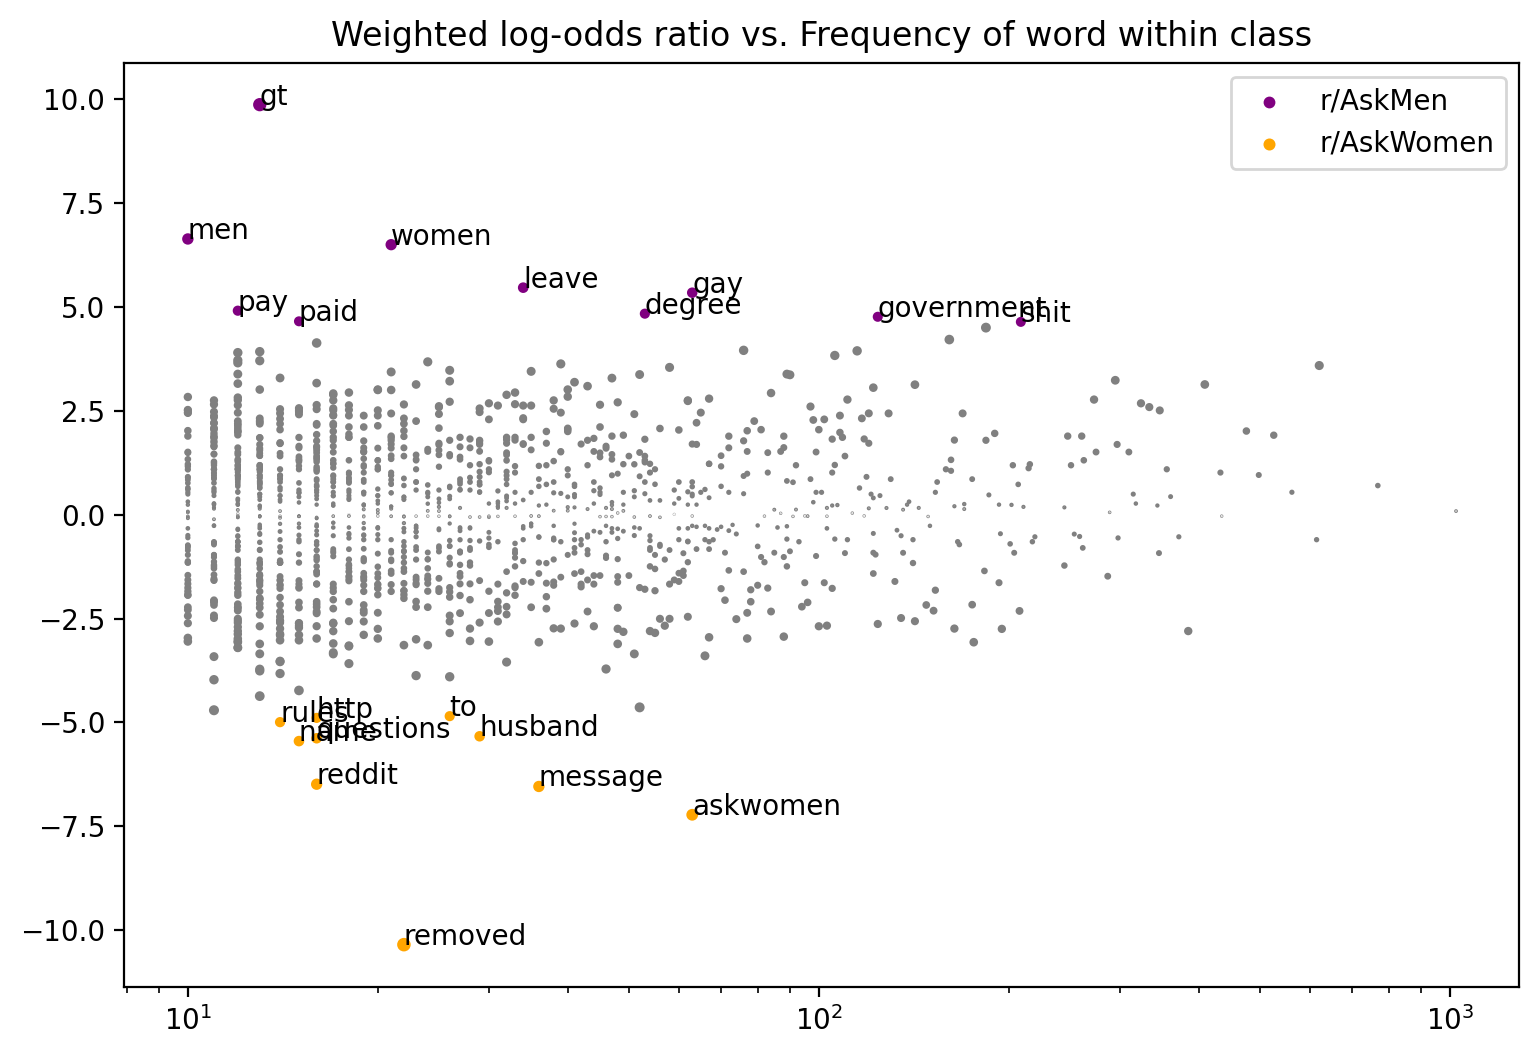

,z-score,class
ngram,,
removed,-10.351839,r/AskWomen
askwomen,-7.224820,r/AskWomen
message,-6.543316,r/AskWomen
reddit,-6.489457,r/AskWomen
name,-5.451249,r/AskWomen
...,...,...
gay,5.344069,r/AskMen
leave,5.465486,r/AskMen
women,6.500500,r/AskMen


In [19]:
fw = FightingWords(ngram_range=(1,1))




fw.fit(reddit_corpus, class1_func=lambda utt: utt.meta['subreddit'] == 'AskMen',
                     class2_func=lambda utt: utt.meta['subreddit'] == 'AskWomen')
                    
df = fw.summarize(reddit_corpus, plot=True, class1_name='r/AskMen', class2_name='r/AskWomen')


df



Research Question: We are looking at the AskMen and AskWomen subreddits. Within these subreddits, we are specifically analyzing the text content of the utterances that are gilded. We will then determine the prevalence of the fighting words within the gilded utterances vs the non-gilded utterances.

Hypothesis: We expect that gilded content will contain fewer fighting words.

Now write down in this text cell some things that you found. How did the results compare to your expectations? Was there anything that surprised you? Is there anything you would do differently?